# **Objetivo**

O objetivo desse projeto é desenvolver um modelo de previsão de preços a partir do dataset oferecido nos materiais do desafio, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema.

Para criar um modelo mais preciso, além do dataframe (DF) original do desafio, será implementado mais dois DFs, sendo eles:

* listings.csv, disponível em: http://insideairbnb.com/get-the-data/
* Airbnb_Open_Data.csv, disponível em: https://www.kaggle.com/code/faressayah/analysis-of-airbnb-data-new-york-city/notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Limpeza pré-processamento**




# **DF (teste_indicium_precificacao.csv)**

In [2]:
df = pd.read_csv('data/teste_indicium_precificacao.csv')

In [3]:
df.shape

(48894, 16)

In [4]:
df.dtypes

id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [7]:
df.head(5)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


As colunas` 'numero_de_reviews', 'ultima_review', 'reviews_por_mes', 'ultima_review', 'reviews_por_mes'` serão removidas pois não influenciam no preço do imóvel, caso tivéssemos uma média das reviews, seria interessante acrescentar ao modelo.

In [8]:
df = df.drop(['numero_de_reviews', 'ultima_review', 'reviews_por_mes', 'ultima_review', 'reviews_por_mes'], axis=1)

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,327.000000,365.000000


A coluna minimo_noites apresenta o valor máximo de 1250, ou seja, um anúncio em que para locar o imóvel, é preciso locar ele pelo prazo mínimo de 1250 dias (~3,5 anos). Como esse dado se destaca, irei analisar ele com mais profundidade.


## **Análise coluna `minimum_nights`**

In [10]:
# Procurando anúncios com ais de 2 anos de tempo mínimo, para analisar.
df.loc[df['minimo_noites'] >= 730]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,calculado_host_listings_count,disponibilidade_365
2853,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,1,362
5766,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,1,365
13403,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,1,42
26340,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,6,249
38663,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,1,365


Acima de 730 dias de locação (2 anos), temos 5 imóveis para locação, sendo 2 no bairro Greenwich Village, um no Harlem, um em Williamsburg e um em Battery Park City.

Analisando cada um dos bairros temos que:

* Greenwich Village é um bairro nobre de New York, tendo no centro do bairro o Washington Square Park, e ficando próximo de prédios da New York University e do metro;
* Harlem é um bairro icônico da cidade, contando com uma forte herança da cultura afro-americana além de ter o icônido Apollo Theater na rua principal;
* Battery Park City é um bairro planejado com uma área de 0.4 km², estando ao lado do centro financeiro de New York;
* Williamsburg é um bairro residencial com uma vida social noturna agitada, mas não se destaca perante outros bairros da cidade.

Visto isso, apesar de pouco usual, o alto tempo de permanência mínima não é um outlier, pois os anúncios não apresentam, no geral, um padrão de erro, sendo bairros icônicos anunciados em sosuma, podendo ser vistos como anúncios de locação de tempo mais alto, em que o usuário usa o Airbnb como plataforma de anúncio, ao invés de um site imobiliário mais tradicional. Com isso, os dados serão mantidos no dataframe.

No DF temos valores nulos apenas na descrição do anúncio, e no nome do proprietário que anunciou. Como esses dados não afetam a precificação do imóvel, serão mantidos no DF.

## **Análise coluna `price`**

In [11]:
df['price'].value_counts().sort_index(ascending=True)

0        11
10       17
11        3
12        4
13        1
         ..
7703      1
8000      1
8500      1
9999      3
10000     3
Name: price, Length: 674, dtype: int64

Pode-se notar 3 registros com valores zerados, eles serão excluídos do df, pois esse deve ser um ruído de coleta, visto que o site não deve aceitar anúncios com valores nulos.

In [12]:
df = df.loc[df['price'] != 0]

Além disso, temos valores considerados baixos para locações residenciais, com isso, iremos analisar mais a fundo os valores abaixo de US50,00.

In [13]:
df.loc[df['price'] <= 50].count()

id                               6550
nome                             6547
host_id                          6550
host_name                        6545
bairro_group                     6550
bairro                           6550
latitude                         6550
longitude                        6550
room_type                        6550
price                            6550
minimo_noites                    6550
calculado_host_listings_count    6550
disponibilidade_365              6550
dtype: int64

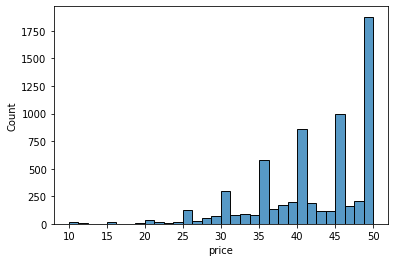

In [14]:
ax = sns.histplot(data=df.loc[df['price'] <= 50], x='price')

Conforme o histrograma acima, é possível notar uma variação crescente conforme o preço do aluguel vai subindo, com picos gradativos a cada US5,00. Como esse df é o modelo proposto no desafio, será considerado normal esses valores, e por isso, serão mantidos.

In [15]:
# Transformando a coluna price em float, para posterior união com demais df do estudo
df['price'] = df['price'].astype('float')

## **Análise coluna `bairro_group` (Distrito)**


In [16]:
df_bairro_group = df['bairro_group'].unique()

print(df_bairro_group)

['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']


New York possui 5 distritos, sendo eles:
* Manhattan;
* Brooklyn;
* Queens;
* Bronx;
* Staten Island;

Com isso, a coluna bairro_group não possui nenhum dado a ser corrigido.

fonte: https://pt.db-city.com/Estados-Unidos--Nova-Iorque--Manhattan--Nova-Iorque

## **Análise coluna `bairro`**


In [17]:
df_bairro = np.sort(df['bairro'].unique())

print(df_bairro)

['Allerton' 'Arden Heights' 'Arrochar' 'Arverne' 'Astoria' 'Bath Beach'
 'Battery Park City' 'Bay Ridge' 'Bay Terrace'
 'Bay Terrace, Staten Island' 'Baychester' 'Bayside' 'Bayswater'
 'Bedford-Stuyvesant' 'Belle Harbor' 'Bellerose' 'Belmont' 'Bensonhurst'
 'Bergen Beach' 'Boerum Hill' 'Borough Park' 'Breezy Point' 'Briarwood'
 'Brighton Beach' 'Bronxdale' 'Brooklyn Heights' 'Brownsville'
 "Bull's Head" 'Bushwick' 'Cambria Heights' 'Canarsie' 'Carroll Gardens'
 'Castle Hill' 'Castleton Corners' 'Chelsea' 'Chinatown' 'City Island'
 'Civic Center' 'Claremont Village' 'Clason Point' 'Clifton'
 'Clinton Hill' 'Co-op City' 'Cobble Hill' 'College Point' 'Columbia St'
 'Concord' 'Concourse' 'Concourse Village' 'Coney Island' 'Corona'
 'Crown Heights' 'Cypress Hills' 'DUMBO' 'Ditmars Steinway' 'Dongan Hills'
 'Douglaston' 'Downtown Brooklyn' 'Dyker Heights' 'East Elmhurst'
 'East Flatbush' 'East Harlem' 'East Morrisania' 'East New York'
 'East Village' 'Eastchester' 'Edenwald' 'Edgemere' 'Elmh

Todos os bairros estão presentes sem erros de digitação.

Fonte: https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Nova_Iorque

In [18]:
df.shape

(48883, 13)

Com a limpeza dos dados, foram removidas 3 colunas e o DF foi mantido com a mesma quantidade de linhas que fornecidas originalmente.

# **DF2 (listings.csv)**

In [19]:
df2 = pd.read_csv('data/listings.csv')

In [20]:
df2.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               11543
Length: 75, dtype: int64

In [21]:
df2.shape

(39719, 75)

As colunas `'listing_url', 'host_location', 'host_neighbourhood', 'neighbourhood', 'source', 'scrape_id', 'last_scraped', 'calendar_last_scraped', 'availability_30', 'availability_60', 'availability_90', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'calendar_last_scraped', 'neighborhood_overview', 'picture_url', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'host_identity_verified', 'host_has_profile_pic', 'license', 'calculated_host_listings_count_entire_homes', 'review_scores_checkin', 'host_verifications', 'host_total_listings_count', 'host_listings_count', 'instant_bookable', 'host_picture_url', 'host_about', 'host_thumbnail_url', 'host_response_time', 'host_is_superhost', 'host_acceptance_rate','host_response_rate', 'host_url', 'calculated_host_listings_count_private_rooms', 'host_since', 'description', 'description', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'minimum_maximum_nights', 'maximum_minimum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'accommodates', 'property_type', 'maximum_nights', 'minimum_minimum_nights'` serão removidas, pois não estão presentes no DF disponibilizado no desafio, e assim, não ser possível utiliza-lás sem perdas.

In [22]:
df2 = df2.drop(['listing_url', 'host_location', 'host_neighbourhood', 'neighbourhood', 'source', 'scrape_id', 'last_scraped', 'calendar_last_scraped', 'availability_30', 'availability_60', 'availability_90', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'calendar_last_scraped', 'neighborhood_overview', 'picture_url', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'host_identity_verified', 'host_has_profile_pic', 'license', 'calculated_host_listings_count_entire_homes', 'review_scores_checkin', 'host_verifications', 'host_total_listings_count', 'host_listings_count', 'instant_bookable', 'host_picture_url', 'host_about', 'host_thumbnail_url', 'host_response_time', 'host_is_superhost', 'host_acceptance_rate','host_response_rate', 'host_url', 'calculated_host_listings_count_private_rooms', 'host_since', 'description', 'description', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'minimum_maximum_nights', 'maximum_minimum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'accommodates', 'property_type', 'maximum_nights', 'minimum_minimum_nights'], axis=1)

In [23]:
# Padronizando os nomes das colunas conforme DF
df2_correct_names = {'name': 'nome', 'neighbourhood_group_cleansed': 'bairro_group', 'neighbourhood_cleansed': 'bairro', 'minimum_nights': 'minimo_noites', 'availability_365': 'disponibilidade_365', 'calculated_host_listings_count': 'calculado_host_listings_count'}

df2 = df2.rename(columns=df2_correct_names)

In [24]:
df2.head(5)

,id,nome,host_id,host_name,bairro,bairro_group,latitude,longitude,room_type,price,minimo_noites,disponibilidade_365,calculado_host_listings_count
0,21935608,Rental unit in New York · ★4.67 · 1 bedroom · ...,5448955,Mike,East Village,Manhattan,40.73179,-73.98679,Entire home/apt,NaN,30,0,1
1,743430766348459803,Rental unit in Brooklyn · 1 bedroom · 1 bed · ...,83422715,D,Flatbush,Brooklyn,40.65375,-73.95502,Entire home/apt,$289.00,30,365,1
2,4539906,Rental unit in New York · 1 bedroom · 1 bed · ...,23540800,Carl,Hell's Kitchen,Manhattan,40.75378,-73.99633,Entire home/apt,NaN,30,0,1
3,22122723,Rental unit in New York · 1 bedroom · 1 bed · ...,43719554,Bersabel,Harlem,Manhattan,40.82440,-73.94598,Private room,NaN,30,0,1
4,22434861,Rental unit in Brooklyn · 3 bedrooms · 4 beds ...,5925222,Sophia,Bushwick,Brooklyn,40.69020,-73.91782,Entire home/apt,NaN,30,0,1


É possível notar que a coluna price possui valores nulos, e a formatação dos dados está diferenteda apresentada em DF, com isso, essa coluna será transformada mais adiante.

In [25]:
df2.duplicated().sum()

0

In [26]:
df2.describe().round(2)

,id,host_id,latitude,longitude,minimo_noites,disponibilidade_365,calculado_host_listings_count
count,3.971900e+04,3.971900e+04,39719.00,39719.00,39719.00,39719.00,39719.00
mean,3.169634e+17,1.618031e+08,40.73,-73.95,29.79,154.65,43.03
std,4.116214e+17,1.733828e+08,0.06,0.05,29.88,148.11,128.68
min,2.595000e+03,1.678000e+03,40.50,-74.25,1.00,0.00,1.00
25%,2.039889e+07,1.701460e+07,40.69,-73.98,30.00,0.00,1.00
50%,4.679108e+07,8.083761e+07,40.73,-73.95,30.00,119.00,1.00
75%,7.665958e+17,2.918683e+08,40.76,-73.93,30.00,315.00,7.00
max,1.061633e+18,5.539914e+08,40.91,-73.71,1250.00,365.00,713.00


In [27]:
df2.loc[df2['minimo_noites'] >= 730]

,id,nome,host_id,host_name,bairro,bairro_group,latitude,longitude,room_type,price,minimo_noites,disponibilidade_365,calculado_host_listings_count
1764,760429890689345478,Home in Queens · ★4.33 · 1 bedroom · 1 bed · 2...,431507708,Albert,Ditmars Steinway,Queens,40.778638,-73.907268,Private room,$85.00,1000,365,4
2765,30378211,Rental unit in New York · 1 bedroom · 1 bed · ...,200401254,Meg,Greenwich Village,Manhattan,40.731520,-74.000520,Shared room,$31.00,999,0,1
2816,40302355,Rental unit in New York · 1 bedroom · 1 bed · ...,257908724,Thejaswini,Morningside Heights,Manhattan,40.804400,-73.965740,Entire home/apt,$50.00,1000,0,1
4409,760501288109274273,Home in Queens · ★4.38 · 1 bedroom · 1 bed · 2...,431507708,Albert,Ditmars Steinway,Queens,40.779590,-73.908440,Private room,$85.00,1000,365,4
4411,760468516411868783,Home in Queens · ★3.80 · 1 bedroom · 1 bed · 2...,431507708,Albert,Ditmars Steinway,Queens,40.779700,-73.907940,Private room,$85.00,1000,365,4
5596,768429807672882485,Rental unit in Queens · ★3.93 · 1 bedroom · 1 ...,314467728,Jose,Flushing,Queens,40.757940,-73.833870,Private room,$85.00,1000,365,3
5597,766928076448468375,Rental unit in Queens · ★4.26 · 1 bedroom · 1 ...,314467728,Jose,Flushing,Queens,40.757660,-73.833980,Private room,$85.00,1000,365,3
7157,768688494578057457,Rental unit in Queens · ★4.07 · 1 bedroom · 1 ...,314467728,Jose,Flushing,Queens,40.759220,-73.834040,Private room,$85.00,1000,365,3
9107,4204302,Rental unit in New York · 1 bedroom · 1 bed · ...,17550546,Genevieve,Greenwich Village,Manhattan,40.732930,-73.997820,Entire home/apt,$180.00,1250,0,1
15119,760483813968654511,Home in Queens · ★4.56 · 1 bedroom · 1 bed · 2...,431507708,Albert,Ditmars Steinway,Queens,40.777700,-73.907600,Private room,$65.00,1000,365,4


No segundo dataframe, temos 12 anúncios com tempo mínimo de permanência de 2 anos, e serão tratados como os vistos anteriormente, ou seja, anúncios corretos que serão mantidos no dataframe. Além disso, nenhuma outra métrica se destaca, com isso, iremos manter os dados inalterados.

## **Análise coluna `price`**

Como a coluna price é crucial para o desenvolvimento do modelo, será removido os dados que não possuem esse dado.

In [28]:
# Remoção do cifrão nos dados númeridos da coluna, assim como a substituição do separador centesimal e a substituição dos valores nulos por 0, para posterior remoção do DF.
df2['price'] = df2['price'].str.replace('$', '', regex=False)
df2['price'] = df2['price'].str.replace(',', '', regex=False)
df2['price'] = df2['price'].fillna(0)

In [29]:
df2['price'] = df2['price'].astype('float')

In [30]:
df2.loc[df2['price'] == 0].count()

id                               10628
nome                             10628
host_id                          10628
host_name                        10623
bairro                           10628
bairro_group                     10628
latitude                         10628
longitude                        10628
room_type                        10628
price                            10628
minimo_noites                    10628
disponibilidade_365              10628
calculado_host_listings_count    10628
dtype: int64

In [31]:
# Removendo valores nulos da coluna price
df2 = df2.loc[df2['price'] != 0]

In [32]:
df2.describe().round(2)

,id,host_id,latitude,longitude,price,minimo_noites,disponibilidade_365,calculado_host_listings_count
count,2.909100e+04,2.909100e+04,29091.00,29091.00,29091.00,29091.00,29091.00,29091.00
mean,4.049022e+17,1.929188e+08,40.73,-73.94,212.54,29.58,209.54,53.59
std,4.270414e+17,1.816742e+08,0.06,0.06,946.73,33.71,135.00,144.26
min,2.595000e+03,1.678000e+03,40.50,-74.25,10.00,1.00,0.00,1.00
25%,3.451766e+07,2.315537e+07,40.69,-73.98,79.00,30.00,87.00,1.00
50%,5.390129e+07,1.304733e+08,40.73,-73.95,128.00,30.00,237.00,2.00
75%,8.316308e+17,3.610108e+08,40.76,-73.92,210.00,30.00,354.00,12.00
max,1.061633e+18,5.539914e+08,40.91,-73.71,100000.00,1250.00,365.00,713.00


Na coluna preco, temos o valor máximo de 100.000,00, o que destoa do restante do DF, assim como de valores típicos de aluguéis residenciais por dia, com isso, iremos nos aprofundar nesse valor.

In [33]:
# Analisando valores de aluguel acima de $5.000,00
df2_price = df2.loc[df2['price'] > 5000]

df2_price.head()

,id,nome,host_id,host_name,bairro,bairro_group,latitude,longitude,room_type,price,minimo_noites,disponibilidade_365,calculado_host_listings_count
1231,36056808,Rental unit in New York · 2 bedrooms · 3 beds ...,271248669,Jenny,Tribeca,Manhattan,40.711680,-74.00840,Entire home/apt,6500.0,180,0,1
1753,22436899,Rental unit in New York · 1 bedroom · 1 bed · ...,72390391,Jelena,Upper West Side,Manhattan,40.771840,-73.98835,Entire home/apt,10000.0,30,0,1
2147,39574087,Hotel in New York · 1 bedroom · 1 bed · 1 priv...,266741420,The Allen Hotel,Lower East Side,Manhattan,40.719180,-73.99123,Private room,10000.0,1,365,3
2637,812941643927531244,Hotel in New York · 3 bedrooms · 3 beds · 3 baths,496944100,RoomPicks,SoHo,Manhattan,40.720531,-73.99904,Private room,6589.0,1,315,259
2722,38993679,Boutique hotel in New York · 1 bedroom · 1 bed...,298338860,The Gregory Hotel,Midtown,Manhattan,40.750880,-73.98644,Private room,10000.0,30,365,3


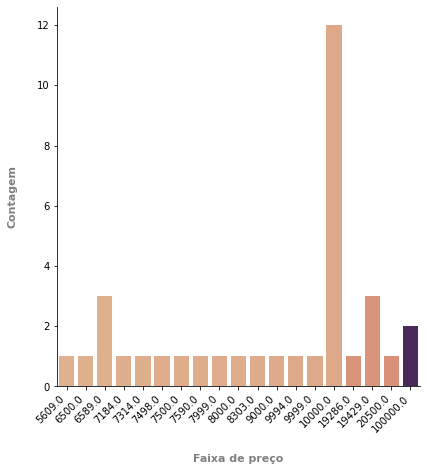

In [34]:
sns.catplot(x="price", data=df2_price, kind="count", height=6, palette='flare', legend=False, hue='price')

plt.xlabel('Faixa de preço', color='grey', labelpad=20, fontweight='bold', fontsize=11)
plt.ylabel('Contagem', color='grey', labelpad=20, fontweight='bold', fontsize=11)

plt.xticks(rotation=45, ha='right')

plt.show()

No df3, temos 35 anúncios com valores de locação maiores que US5.000,00, sendo apenas 7 (20%) acima de US10.000,00. Nesse caso, iremos mais a fundo nesses 7 casos:

In [35]:
# Analisando valores de aluguel acima de $10.000,00
df2_price_over = df2.loc[df2['price'] > 10000]

df2_price_over.head(10)

,id,nome,host_id,host_name,bairro,bairro_group,latitude,longitude,room_type,price,minimo_noites,disponibilidade_365,calculado_host_listings_count
6600,904523946643334652,Hotel in New York · 1 bedroom · 1 bed · 1.5 baths,326084746,Suiteness,SoHo,Manhattan,40.719132,-73.999874,Private room,19429.0,1,119,68
6660,904524223667771043,Hotel in New York · 1 bedroom · 2 beds · 1.5 b...,326084746,Suiteness,SoHo,Manhattan,40.719132,-73.999874,Private room,19429.0,1,119,68
6781,904524100106225881,Hotel in New York · 1 bedroom · 2 beds · 2.5 b...,326084746,Suiteness,SoHo,Manhattan,40.719132,-73.999874,Private room,19429.0,1,119,68
8294,904527164135938359,Hotel in New York · 2 bedrooms · 2 beds · 2 baths,326084746,Suiteness,Midtown,Manhattan,40.752840,-73.980950,Private room,19286.0,1,119,68
10399,17160286,Rental unit in Brooklyn · ★4.48 · 1 bedroom · ...,110361431,Bobbi,Bedford-Stuyvesant,Brooklyn,40.690850,-73.938060,Private room,100000.0,30,346,2
13458,605115521796576121,Rental unit in Brooklyn · ★4.33 · 1 bedroom · ...,110361431,Bobbi,Bedford-Stuyvesant,Brooklyn,40.692540,-73.936360,Private room,100000.0,30,365,2
27685,17416959,Guest suite in New York · 4 bedrooms · 11 beds...,1261480,Doungrat,Harlem,Manhattan,40.806160,-73.951110,Private room,20500.0,3,154,7


Podemos perceber que os anúncios com valores acima de US10.000,00 possuem os mesmos anunciantes, e apesar de a latitude e longitude ser iguais em 3 dos anúncios, é possível que os mesmos sejam no mesmo prédio, mas em andares diferentes.

Fazendo uma busca por imóveis para aluguel na cidade, é possível encontrar imóveis com valores similares aos anunciados, próximos a US20.000,00, mas como o anúncio de US100.000,00 é 5x maior que os anúncios logo abaixo, e não sendo possível encontrar nenhum imóvel nessa faixa de preço no site da Airbnb, irei considerar esse valor um outlier e remover ele no df.

In [36]:
df2 = df2.loc[df2['price'] < 100000]

## **Análise coluna `bairro_group` (Distrito)**


In [37]:
df2_bairro_group = df2['bairro_group'].unique()

print(df2_bairro_group)

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']


O DF possui todos os distritos de New York, assim como nenhum inserido de forma incorreta.

## **Análise coluna `bairro`**


In [38]:
df2_bairro = np.sort(df2['bairro'].unique())

print(df2_bairro)

['Allerton' 'Arden Heights' 'Arrochar' 'Arverne' 'Astoria' 'Bath Beach'
 'Battery Park City' 'Bay Ridge' 'Bay Terrace'
 'Bay Terrace, Staten Island' 'Baychester' 'Bayside' 'Bayswater'
 'Bedford-Stuyvesant' 'Belle Harbor' 'Bellerose' 'Belmont' 'Bensonhurst'
 'Bergen Beach' 'Boerum Hill' 'Borough Park' 'Breezy Point' 'Briarwood'
 'Brighton Beach' 'Bronxdale' 'Brooklyn Heights' 'Brownsville'
 "Bull's Head" 'Bushwick' 'Cambria Heights' 'Canarsie' 'Carroll Gardens'
 'Castle Hill' 'Castleton Corners' 'Chelsea' 'Chelsea, Staten Island'
 'Chinatown' 'City Island' 'Civic Center' 'Claremont Village'
 'Clason Point' 'Clifton' 'Clinton Hill' 'Co-op City' 'Cobble Hill'
 'College Point' 'Columbia St' 'Concord' 'Concourse' 'Concourse Village'
 'Coney Island' 'Corona' 'Crown Heights' 'Cypress Hills' 'DUMBO'
 'Ditmars Steinway' 'Dongan Hills' 'Douglaston' 'Downtown Brooklyn'
 'Dyker Heights' 'East Elmhurst' 'East Flatbush' 'East Harlem'
 'East Morrisania' 'East New York' 'East Village' 'Eastchester' 'E

DF possui 221 bairros, enquanto DF2 possui 222 bairros, com isso, será feita uma verificação sobre essa diferença.

In [39]:
# Comparando os bairros presentes em cada df
diferenca_simetrica = list(set(df_bairro) ^ set(df2_bairro))

print(diferenca_simetrica)

['Chelsea, Staten Island', 'New Dorp', 'Gerritsen Beach']


Conforme visto acima, as diferenças são de 3 bairros, que serão corrigidas da seguinte forma:
* Chelsea, Staten Island será substituído por Chelsea;
* New Dorp será mantido, e New Dorp Beach será substituído por New Dorp, visto que esse é o bairro, e a praia faz parte do mesmo;
* Gerritsen Beach é um bairro de New York, apenas não está presente no primeiro df, e por isso, será mantido.

In [40]:
df2['bairro'] = df2['bairro'].str.replace('Chelsea, Staten Island', 'Chelsea')
df2['bairro'] = df2['bairro'].str.replace('New Dorp Beach', 'New Dorp')
df['bairro'] = df['bairro'].str.replace('New Dorp Beach', 'New Dorp')

In [41]:
df2_bairro = np.sort(df2['bairro'].unique())

print(df2_bairro)

['Allerton' 'Arden Heights' 'Arrochar' 'Arverne' 'Astoria' 'Bath Beach'
 'Battery Park City' 'Bay Ridge' 'Bay Terrace'
 'Bay Terrace, Staten Island' 'Baychester' 'Bayside' 'Bayswater'
 'Bedford-Stuyvesant' 'Belle Harbor' 'Bellerose' 'Belmont' 'Bensonhurst'
 'Bergen Beach' 'Boerum Hill' 'Borough Park' 'Breezy Point' 'Briarwood'
 'Brighton Beach' 'Bronxdale' 'Brooklyn Heights' 'Brownsville'
 "Bull's Head" 'Bushwick' 'Cambria Heights' 'Canarsie' 'Carroll Gardens'
 'Castle Hill' 'Castleton Corners' 'Chelsea' 'Chinatown' 'City Island'
 'Civic Center' 'Claremont Village' 'Clason Point' 'Clifton'
 'Clinton Hill' 'Co-op City' 'Cobble Hill' 'College Point' 'Columbia St'
 'Concord' 'Concourse' 'Concourse Village' 'Coney Island' 'Corona'
 'Crown Heights' 'Cypress Hills' 'DUMBO' 'Ditmars Steinway' 'Dongan Hills'
 'Douglaston' 'Downtown Brooklyn' 'Dyker Heights' 'East Elmhurst'
 'East Flatbush' 'East Harlem' 'East Morrisania' 'East New York'
 'East Village' 'Eastchester' 'Edenwald' 'Edgemere' 'Elmh

In [42]:
df2.shape

(29089, 13)

Com a limpeza do DF, foram removidas 62 colunas e 10.628 linhas, o que corresponde a 26,76% dos dados originais.


# DF3 **(Airbnb_Open_Data.csv)**

In [43]:
df3 = pd.read_csv('data/Airbnb_Open_Data.csv')

C:\Users\franc\AppData\Local\Temp\ipykernel_4320\2130670198.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('data/Airbnb_Open_Data.csv')


In [44]:
df3.shape

(102599, 26)

In [45]:
df3.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [46]:
df2.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro                           0
bairro_group                     0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
disponibilidade_365              0
calculado_host_listings_count    0
dtype: int64

As colunas `'host_identity_verified', 'country', 'number of reviews', 'last review', 'reviews per month', 'house_rules', 'license', 'Construction year', 'instant_bookable', 'country code', 'cancellation_policy', 'service fee', 'review rate number'` serão removidas, pois não estão presentes no DF disponibilizado no desafio, e assim, não ser possível utiliza-lás sem perdas.

In [47]:
df3 = df3.drop(['host_identity_verified', 'country', 'number of reviews', 'last review', 'reviews per month', 'house_rules', 'license', 'Construction year', 'instant_bookable', 'country code', 'cancellation_policy', 'service fee', 'review rate number'], axis=1)

In [48]:
# Padronizando os nomes das colunas conforme DF
df3_correct_names = {'NAME': 'nome', 'host id': 'host_id', 'host name': 'host_name', 'neighbourhood group': 'bairro_group', 'neighbourhood': 'bairro', 'lat': 'latitude', 'long': 'longitude', 'room type': 'room_type', 'minimum nights': 'minimo_noites', 'calculated host listings count': 'calculado_host_listings_count', 'availability 365': 'disponibilidade_365'}

df3 = df3.rename(columns=df3_correct_names)

In [49]:
df3.describe().round(2)

,id,host_id,latitude,longitude,minimo_noites,calculado_host_listings_count,disponibilidade_365
count,102599.00,1.025990e+05,102591.00,102591.00,102190.00,102280.00,102151.00
mean,29146234.52,4.925411e+10,40.73,-73.95,8.14,7.94,141.13
std,16257505.61,2.853900e+10,0.06,0.05,30.55,32.22,135.44
min,1001254.00,1.236005e+08,40.50,-74.25,-1223.00,1.00,-10.00
25%,15085814.50,2.458333e+10,40.69,-73.98,2.00,1.00,3.00
50%,29136603.00,4.911774e+10,40.72,-73.95,3.00,1.00,96.00
75%,43201198.00,7.399650e+10,40.76,-73.93,5.00,2.00,269.00
max,57367417.00,9.876313e+10,40.92,-73.71,5645.00,332.00,3677.00


Nesse dataframe, temos 4 pontos em 2 métricas que se destacam, e que serão analisadas mais a fundo, sendo elas:

* minimum nights: possui valor mínimo de -1223 dias, não sendo possível números negativos nessa métrica e o número máximo de 5645 dias (~15,5 anos), sendo um valor alto para contratos de locação residencial.
* availability 365: possui valor mínimo de -10 dias, não sendo possível números negativos nessa métrica e o número máximo de 3677 dias (~10,1 anos), não sendo possível números maiores que 365 dias para essa métrica.

## **Análise coluna `minimum_noites`**

In [50]:
df3.loc[df3['minimo_noites'] <= 0]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,calculado_host_listings_count,disponibilidade_365
176,1098541,BROOKLYN VICTORIAN STYLE SUITE.....,83631499592,Frederick,Brooklyn,Fort Greene,40.69098,-73.97113,Private room,"$1,155",-10.0,2.0,19.0
352,1195746,"Beautiful, Bright’s, Warm & Spacious 1.5BR Apt",2227683633,Grant,Brooklyn,Crown Heights,40.67174,-73.95663,Entire home/apt,$73,-5.0,1.0,31.0
398,1221151,SUPER BIG AND COZY PRIVATE BEDROOM,50336791874,Tucker,Brooklyn,Kensington,40.64302,-73.97255,Private room,$779,-1.0,2.0,131.0
421,1233854,Charming Nolita Apartment!!,7389895192,Belinda,Manhattan,Nolita,40.72094,-73.99706,Entire home/apt,$874,-10.0,1.0,13.0
441,1244900,Cozy apartment in a brownstone,81186886194,Adelaide,Manhattan,Harlem,40.80497,-73.95016,Entire home/apt,$920,-12.0,3.0,77.0
478,1265335,Charming upper west side apartment,89878315253,Alen,Manhattan,Upper West Side,40.77886,-73.98042,Entire home/apt,$410,-2.0,1.0,381.0
525,1291294,Chateau Style Brooklyn Loft for Singles or Cou...,2631536622,Carlos,Brooklyn,Bedford-Stuyvesant,40.68967,-73.95445,Entire home/apt,$413,-3.0,1.0,292.0
42446,24444262,"Cozy room in bright, spacious apartment",84040511136,Steven,Bronx,Hunts Point,40.81731,-73.89052,Private room,"$1,200",-1223.0,4.0,341.0
42500,24474086,2bd BOUTIQUE Apartament in the heart of MANHA...,2679070022,Tom,Manhattan,Hell's Kitchen,40.76694,-73.98773,Entire home/apt,$711,-365.0,4.0,0.0
42538,24495073,Newly Renovated Garden Apartment,98469733112,Margie,Brooklyn,Bedford-Stuyvesant,40.68470,-73.94350,Entire home/apt,$85,-200.0,1.0,157.0


Anúncios com dias negativos podem ser um erro do site de anúncios, da coleta dos dados ou de algum processamento feito no dataframe, por isso, serão removidos.

In [51]:
df3 = df3.loc[df3['minimo_noites'] >= 0]

In [52]:
df3.loc[df3['minimo_noites'] >= 1825]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,calculado_host_listings_count,disponibilidade_365
350,1194641,LARGE 1BR (CONV 2BR) CROWN HEIGHTS,66643346348,Russell,Brooklyn,Crown Heights,40.67473,-73.94494,Entire home/apt,"$1,142",3455.0,1.0,NaN
42398,24417751,Bedroom in Prime Bushwick,29378706293,Elena,Brooklyn,Bushwick,40.70235,-73.92892,Private room,$453,5645.0,1.0,0.0
42407,24422722,Modern & Cozy 2 BR Private Apartment in Brooklyn,83669529485,Gk,Brooklyn,Bay Ridge,40.63189,-74.02322,Entire home/apt,$843,2645.0,1.0,271.0


Anúncios com mais de 1825 dias (5 anos), são incomuns, sendo apenas 3 em uma base de mais de 100.000 anúncios, por isso, irei considerar eles outliers, e remover do DF.

In [53]:
# Removendo valores de locação mínima superiores a 1825 dias
df3 = df3.loc[df3['minimo_noites'] < 1825]

In [54]:
df3.loc[df3['disponibilidade_365'] < 0]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,calculado_host_listings_count,disponibilidade_365
170,1095227,New York room with a view,95792367490,Dexter,Staten Island,St. George,40.64524,-74.08088,Private room,"$1,015",131.0,1.0,-1.0
236,1131679,NaN,74291995690,Cameron,Manhattan,East Harlem,40.79163,-73.94573,Entire home/apt,"$1,052",28.0,2.0,-6.0
251,1139963,B NYC Staten Alternative...,13992927619,Fowler,Staten Island,Tompkinsville,40.63627,-74.08543,Private room,$784,2.0,6.0,-1.0
308,1171444,NaN,92124810462,Thompson,Manhattan,West Village,40.72966,-74.00243,Entire home/apt,$935,30.0,1.0,-9.0
462,1256499,Beautiful Brooklyn Oasis,64691515953,Julia,Brooklyn,Crown Heights,40.67212,-73.95060,Entire home/apt,$293,2.0,1.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86735,48905077,Comfortable 2 BR in East Village/Cooper Square,66319244844,Cooper,Manhattan,East Village,40.72627,-73.99145,Entire home/apt,$335,3.0,1.0,-4.0
86764,48921093,"Beautiful hip location, with a light of sunshine.",11182626298,Noemi,Queens,Ridgewood,40.70971,-73.89741,Entire home/apt,$606,28.0,1.0,-2.0
86790,48935453,Beautiful Quiet Bedroom near City College,59344299465,Erika,Manhattan,Harlem,40.81863,-73.95295,Private room,$948,2.0,3.0,-7.0
86853,48970248,West Chelsea 1 bedroom 2 bathroom outdoor space.,34380933090,Alison,Manhattan,Chelsea,40.74584,-74.00279,Entire home/apt,$651,14.0,1.0,-7.0


A coluna availability 365 contém o número de dias em que o anúncio está disponível para reserva, não sendo possível ser um número abaixo de 0, pois o número máximo de dias disponíveis é o mesmo que os dias do ano. Esse erro pode ser causado por diversos fatores, como coleta dos dados, erro do site com anos bissestos, processamento do dataframe, entre outros. Com isso, e pela contida de anúncios com o erro ser uma pequena amostra do total (0.00416%), esses dados serão removidos da amostra.

In [55]:
# Removendo valores de disponibilidade remanescente menores que 0 (lotado pelo ano todo)
df3 = df3.loc[df3['disponibilidade_365'] >= 0]

In [56]:
df3.loc[df3['disponibilidade_365'] > 365]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,calculado_host_listings_count,disponibilidade_365
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,$577,3.0,1.0,374.0
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,Carl,Manhattan,Upper West Side,40.80178,-73.96723,Private room,$291,2.0,1.0,375.0
25,1015144,"MAISON DES SIRENES1,bohemian apartment",48387947293,Miranda,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,"$1,175",2.0,2.0,372.0
33,1019562,Loft in Williamsburg Area w/ Roof,50968902783,John,Brooklyn,Greenpoint,40.72219,-73.93762,Private room,$858,4.0,3.0,383.0
34,1020114,back room/bunk beds,25066620900,Alfred,Manhattan,Harlem,40.82130,-73.95318,Private room,$545,3.0,3.0,411.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102582,6085810,Private room in the best part of BK,4746552394,Brad,Brooklyn,Crown Heights,40.66743,-73.94712,Private room,$516,7.0,1.0,425.0
102584,6086914,2 block walk from the beach in NYC,70051719594,Vladimir,Queens,Arverne,40.59270,-73.78990,Entire home/apt,$566,2.0,1.0,394.0
102588,6089124,"Loft Space for Events, Meetings & Shoots",85557432222,Kalin,Manhattan,Flatiron District,40.74068,-73.98999,Entire home/apt,$618,1.0,1.0,410.0
102595,6092990,Best Location near Columbia U,77864383453,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,Private room,$837,1.0,2.0,395.0


Como não é possível um número maior que 365 dias, os anúncios com tal valor serão removidos do database, devido a falta de confiabilidade nos dados presentes nesses anúncios.

In [57]:
# Removendo valores de locação remanescente superiores a 365 dias (mais disponibilidade que o ano possui)
df3 = df3.loc[df3['disponibilidade_365'] <= 365]

In [58]:
df3.duplicated().sum()

503

In [59]:
df3 = df3.drop_duplicates()

In [60]:
df3.isnull().sum()

id                                 0
nome                             217
host_id                            0
host_name                        385
bairro_group                      16
bairro                            12
latitude                           8
longitude                          8
room_type                          0
price                            235
minimo_noites                      0
calculado_host_listings_count    290
disponibilidade_365                0
dtype: int64

## **Análise coluna `price`**

Como a coluna price é crucial para o desenvolvimento do modelo, será removido os dados que não possuem esse dado.

In [61]:
df3['price'] = df3['price'].str.replace('$', '', regex=False)
df3['price'] = df3['price'].str.replace(',', '', regex=False)
df3['price'] = df3['price'].fillna(0)

In [62]:
# Removendo valores nulos na coluna price
df3 = df3.loc[df3['price'] != 0]

In [63]:
df3['price'] = df3['price'].astype('float')

In [64]:
df3.describe().round(2)

,id,host_id,latitude,longitude,price,minimo_noites,calculado_host_listings_count,disponibilidade_365
count,97820.00,9.782000e+04,97812.00,97812.00,97820.00,97820.00,97530.00,97820.00
mean,29826821.87,4.924191e+10,40.73,-73.95,625.86,8.05,8.05,134.42
std,15990189.87,2.854222e+10,0.06,0.05,331.71,20.61,32.66,129.81
min,1001254.00,1.236005e+08,40.50,-74.25,50.00,1.00,1.00,0.00
25%,16219824.75,2.456154e+10,40.69,-73.98,340.00,2.00,1.00,2.00
50%,29965329.00,4.910848e+10,40.72,-73.95,626.00,3.00,1.00,90.00
75%,43560055.00,7.396777e+10,40.76,-73.93,913.25,5.00,2.00,254.00
max,57367417.00,9.876313e+10,40.92,-73.71,1200.00,1250.00,332.00,365.00


## **Análise coluna `bairro_group` (Distrito)**


In [65]:
df3_bairro_group = df3['bairro_group'].unique()

print(df3_bairro_group)

['Brooklyn' 'Manhattan' 'brookln' 'manhatan' nan 'Bronx' 'Queens'
 'Staten Island']


É possível notar que o df3 possui distritos escritos com o nome errado, além de distritos nulos. Esses problemas serão corrigidos adiante.

In [66]:
# Corrigindo os nomes errados dos bairros
df3['bairro_group'] = df3['bairro_group'].str.replace('manhatan', 'Manhattan', regex=False)
df3['bairro_group'] = df3['bairro_group'].str.replace('brookln', 'Brooklyn', regex=False)

## **Análise coluna bairro**

In [67]:
df3['bairro'] = df3['bairro'].fillna(0)

In [68]:
df3_bairro = df3.loc[df3['bairro'] != 0]

In [69]:
df3_bairro = np.sort(df3_bairro['bairro'].unique())

print(df3_bairro)

['Allerton' 'Arden Heights' 'Arrochar' 'Arverne' 'Astoria' 'Bath Beach'
 'Battery Park City' 'Bay Ridge' 'Bay Terrace'
 'Bay Terrace, Staten Island' 'Baychester' 'Bayside' 'Bayswater'
 'Bedford-Stuyvesant' 'Belle Harbor' 'Bellerose' 'Belmont' 'Bensonhurst'
 'Bergen Beach' 'Boerum Hill' 'Borough Park' 'Breezy Point' 'Briarwood'
 'Brighton Beach' 'Bronxdale' 'Brooklyn Heights' 'Brownsville'
 "Bull's Head" 'Bushwick' 'Cambria Heights' 'Canarsie' 'Carroll Gardens'
 'Castle Hill' 'Castleton Corners' 'Chelsea' 'Chelsea, Staten Island'
 'Chinatown' 'City Island' 'Civic Center' 'Claremont Village'
 'Clason Point' 'Clifton' 'Clinton Hill' 'Co-op City' 'Cobble Hill'
 'College Point' 'Columbia St' 'Concord' 'Concourse' 'Concourse Village'
 'Coney Island' 'Corona' 'Crown Heights' 'Cypress Hills' 'DUMBO'
 'Ditmars Steinway' 'Dongan Hills' 'Douglaston' 'Downtown Brooklyn'
 'Dyker Heights' 'East Elmhurst' 'East Flatbush' 'East Harlem'
 'East Morrisania' 'East New York' 'East Village' 'Eastchester' 'E

In [70]:
len(df3_bairro)

224

In [71]:
# Comparando os bairros presentes entre df2 e df3
diferenca_simetrica = list(set(df2_bairro) ^ set(df3_bairro))

print(diferenca_simetrica)

['Glen Oaks', 'Chelsea, Staten Island', 'New Dorp Beach']


Conforme visto acima, as diferenças são de 3 bairros, que serão corrigidas da seguinte forma:

* Chelsea, Staten Island será substituído por Chelsea;
* New Dorp será mantido, e New Dorp Beach será substituído por New Dorp, visto que esse é o bairro, e a praia faz parte do mesmo;
* Glen Oaks é um bairro de New York, apenas não está presente no df2, e por isso, será mantido.

In [72]:
df3['bairro'] = df3['bairro'].str.replace('Chelsea, Staten Island', 'Chelsea')
df3['bairro'] = df3['bairro'].str.replace('New Dorp Beach', 'New Dorp')

In [73]:
df3.shape

(97820, 13)

Com a limpeza do DF, foram removidas 13 colunas e 10.628 linhas, o que corresponde a 4,66% dos dados originais.



# **Juntando os 3 dataframes**


In [74]:
df_concated = pd.concat([df, df2, df3], ignore_index=True)

In [75]:
df_concated['id'].duplicated().sum()

6194

In [76]:
df_cleaned = df_concated.drop_duplicates(subset=['id'])

In [77]:
df_cleaned.isnull().sum()

id                                 0
nome                             230
host_id                            0
host_name                        401
bairro_group                      15
bairro                            11
latitude                           8
longitude                          8
room_type                          0
price                              0
minimo_noites                      0
calculado_host_listings_count    289
disponibilidade_365                0
dtype: int64

In [78]:
df_cleaned.describe()

,id,host_id,latitude,longitude,price,minimo_noites,calculado_host_listings_count,disponibilidade_365
count,1.695980e+05,1.695980e+05,169590.000000,169590.000000,169598.000000,169598.000000,169309.000000,169598.000000
mean,6.944896e+16,2.842375e+10,40.728457,-73.949227,433.062076,10.555962,15.121860,139.154512
std,2.336155e+17,3.253658e+10,0.055856,0.050421,402.520252,23.468431,66.691219,134.544281
min,2.595000e+03,1.678000e+03,40.499790,-74.251907,10.000000,1.000000,1.000000,0.000000
25%,1.521547e+07,8.333547e+07,40.688970,-73.982740,119.000000,2.000000,1.000000,0.000000
50%,2.900377e+07,1.286570e+10,40.723090,-73.954570,294.000000,3.000000,1.000000,91.000000
75%,4.420045e+07,5.569013e+10,40.762850,-73.931500,716.000000,12.000000,3.000000,269.000000
max,1.061633e+18,9.876313e+10,40.916970,-73.705220,20500.000000,1250.000000,713.000000,365.000000


In [79]:
df_cleaned.dtypes

id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                            float64
minimo_noites                    float64
calculado_host_listings_count    float64
disponibilidade_365              float64
dtype: object

# **Output**

In [80]:
df_cleaned.isnull().sum()

id                                 0
nome                             230
host_id                            0
host_name                        401
bairro_group                      15
bairro                            11
latitude                           8
longitude                          8
room_type                          0
price                              0
minimo_noites                      0
calculado_host_listings_count    289
disponibilidade_365                0
dtype: int64

In [81]:
output_file = "data/df_cleaned.csv"

df_cleaned.to_csv(output_file, index=False)